# Evaluation Project - 8 - Rainfall Prediction - Weather Forecasting

# Problem Statement: 

    Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

    Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

    1. Problem Statement: 
    a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
    b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Dataset Description:

    Number of columns: 23


    Date  - The date of observation
    Location  -The common name of the location of the weather station
    MinTemp  -The minimum temperature in degrees celsius
    MaxTemp -The maximum temperature in degrees celsius
    Rainfall  -The amount of rainfall recorded for the day in mm
    Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    Sunshine  -The number of hours of bright sunshine in the day.
    WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
    WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    WindDir9am -Direction of the wind at 9am
    WindDir3pm -Direction of the wind at 3pm
    WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
    WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    Humidity9am -Humidity (percent) at 9am
    Humidity3pm -Humidity (percent) at 3pm
    Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
    Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    Cloud9am - Fraction of sky obscured by cloud at 9am. 
    Cloud3pm -Fraction of sky obscured by cloud 
    Temp9am-Temperature (degrees C) at 9am
    Temp3pm -Temperature (degrees C) at 3pm
    RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Independent and dependent variables 
    Independent Variables: Date, Location, MinTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, Windspeed9am, WindSpeed3pm, Humadity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, and Temp3pM
    Dependent Variables: RainToday, RainTomorrow

    We have 10 rows and 23 columns. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


### Describing the daaset: 

1. The data is sort of imbalanced in terms of count. 
2. Standard deviation of almost all the variables are quite high. There is a huge deviation in the median and mean value. 
3. It is not normally distributed; skewness do exsist in the distribution. 

# We do have missing values in the dataset. Filling it now.

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
cat=[col for col in df.columns if df[col].dtypes=='object']
cont=[col for col in df.columns if df[col].dtypes!='object']
print("Categorical variables are as follows: ", cat)
print("Continous variable are as follows: ", cont)

Categorical variables are as follows:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Continous variable are as follows:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# Explorotary Data Analysis: 

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

No     73.531157
Yes    23.632047
NaN     2.836795
Name: RainTomorrow, dtype: float64


<AxesSubplot:title={'center':'Target Fetaure ( Rain Tomorrow) -Categories'}, xlabel='RainTomorrow', ylabel='count'>

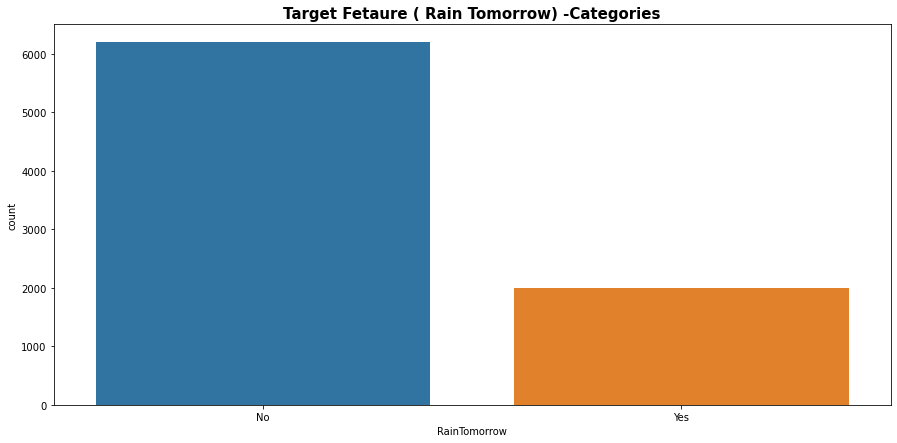

In [11]:
print(df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100)
plt.figure(figsize=[15,7])
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
sns.countplot(df['RainTomorrow'])

As per the rain prediction, majority of the times, rain didn't happened tommorow. When it rained, it is very less as compared to when it didn't rained.

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


<AxesSubplot:xlabel='Location', ylabel='count'>

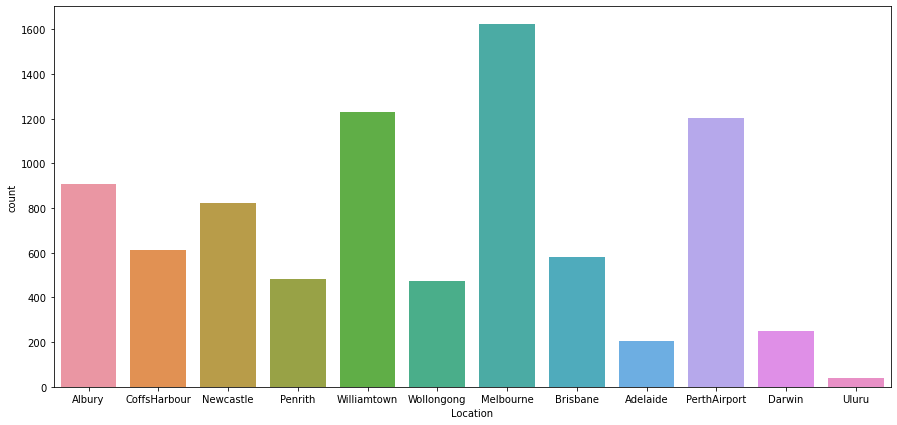

In [12]:
print(df['Location'].value_counts(ascending=False))
plt.figure(figsize=[15,7])
sns.countplot(df['Location'])

On top, there is Melbourne, Williamttown where the rain prediction is done majority of the times.

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

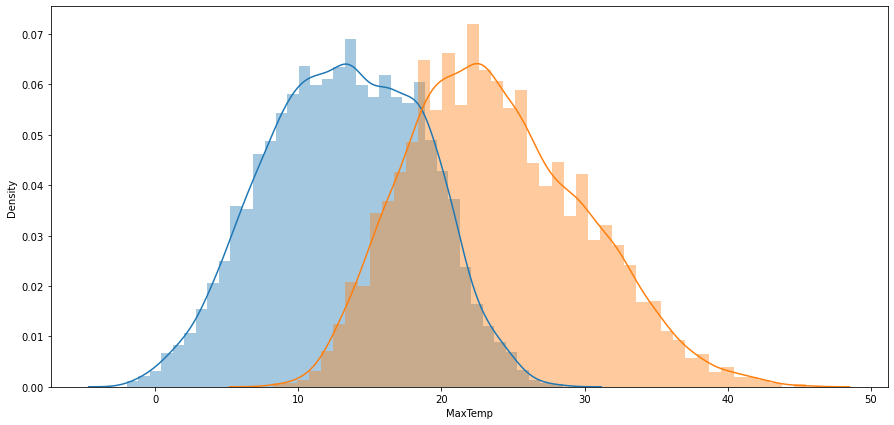

In [13]:
plt.figure(figsize=[15,7])
sns.distplot(df['MinTemp'])
sns.distplot(df['MaxTemp'])

Both the variables holds normal distribution.

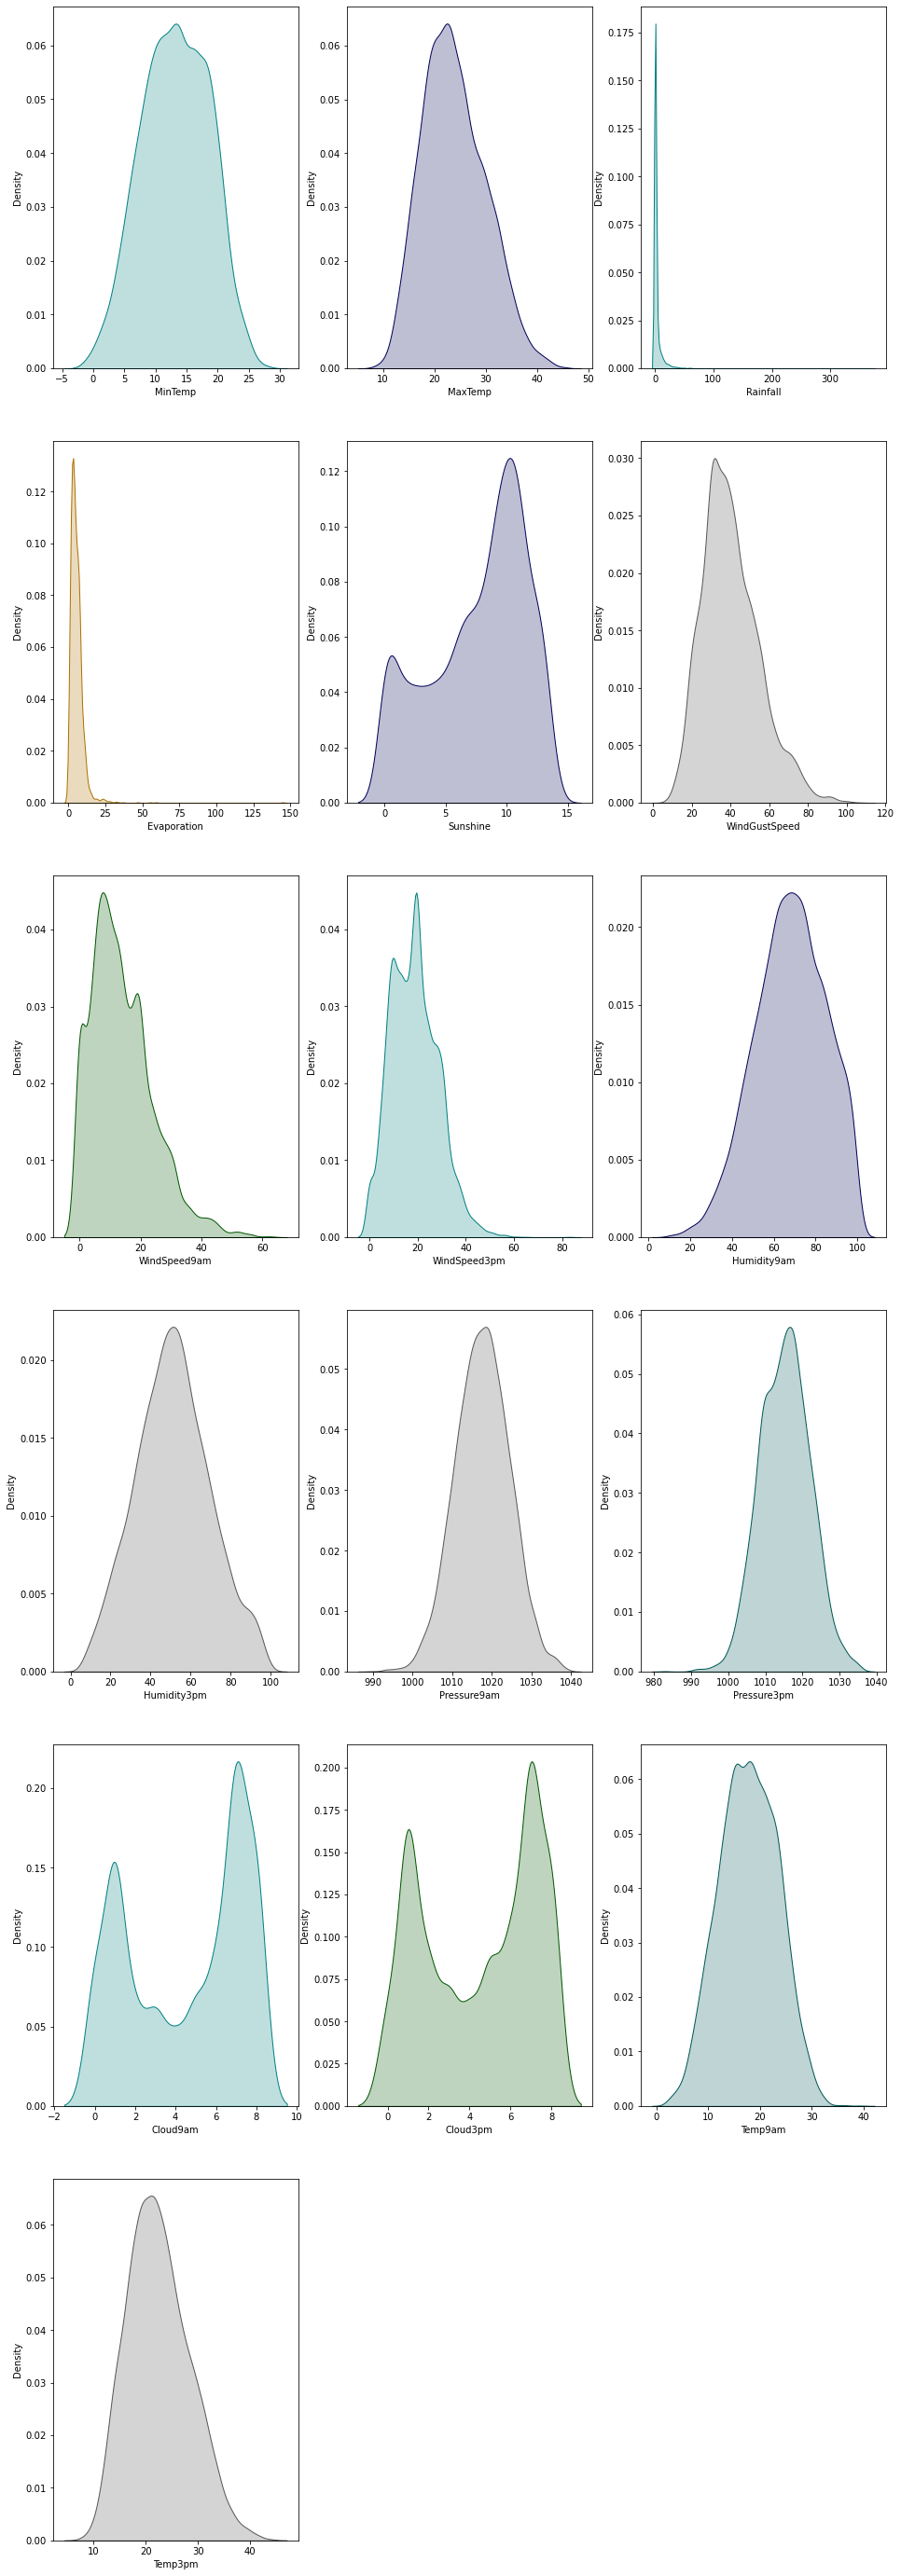

In [15]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

Continous Variables like MinTemp, MaxTemp, WindGustSpeed, Humadity, and Pressure holds a equally normal distributed data. However toher varaibles do have some skewness avilable in the dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

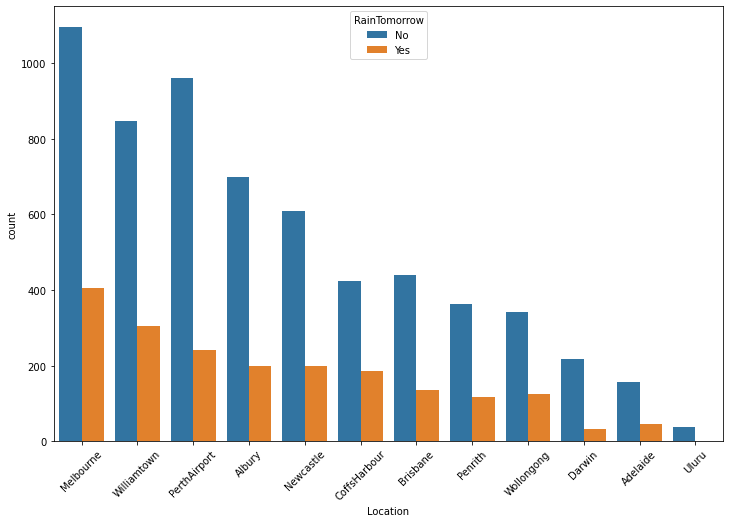

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index,hue=df['RainTomorrow'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

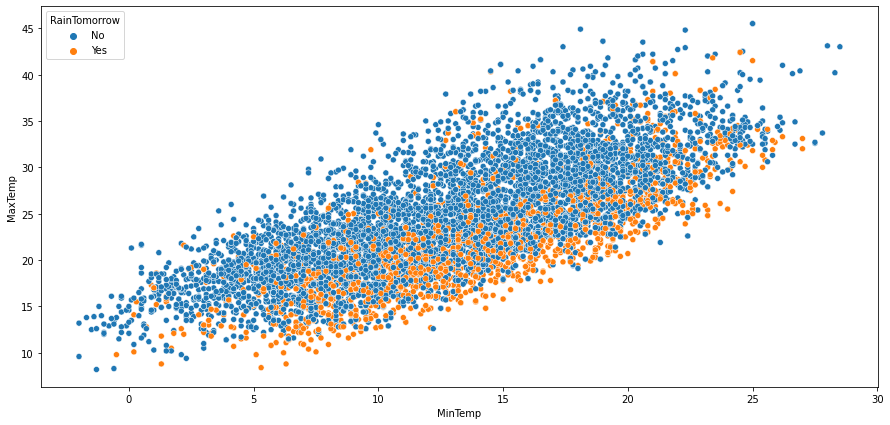

In [21]:
plt.figure(figsize=[15,7])
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)

Both the variables are following the linear path only.

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

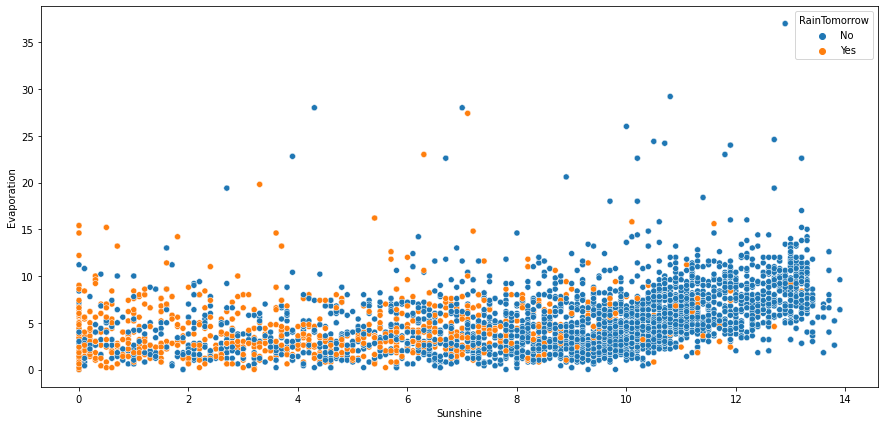

In [23]:
plt.figure(figsize=[15,7])
sns.scatterplot(df['Sunshine'],df['Evaporation'],hue='RainTomorrow',data=df)

Data is scattered in terms of sunshine and evaporation variable.

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindGustDir'>

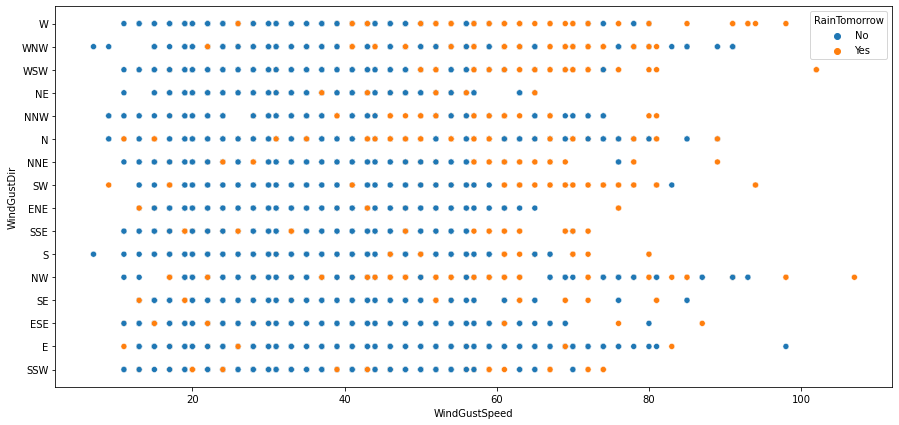

In [24]:
plt.figure(figsize=[15,7])
sns.scatterplot(df['WindGustSpeed'],df['WindGustDir'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

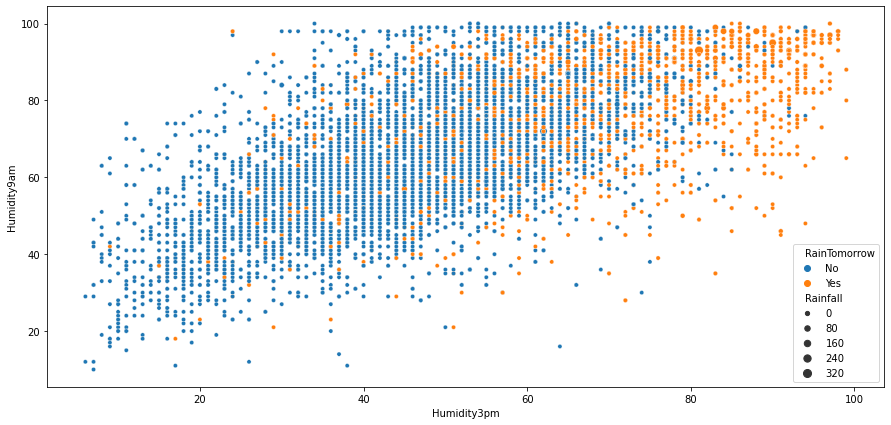

In [25]:
plt.figure(figsize=(15,7))
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

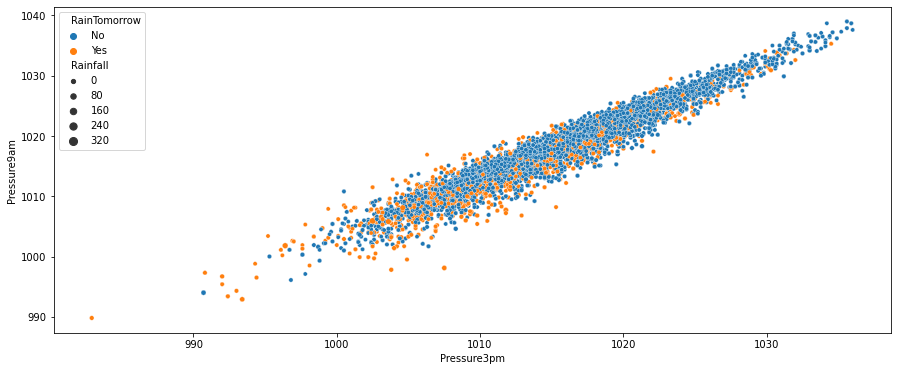

In [26]:
plt.figure(figsize=(15,6))
sns.scatterplot(df['Pressure3pm'],df['Pressure9am'],hue='RainTomorrow',size='Rainfall',data=df)

No     6195
Yes    1990
Name: RainToday, dtype: int64


<AxesSubplot:xlabel='RainToday', ylabel='count'>

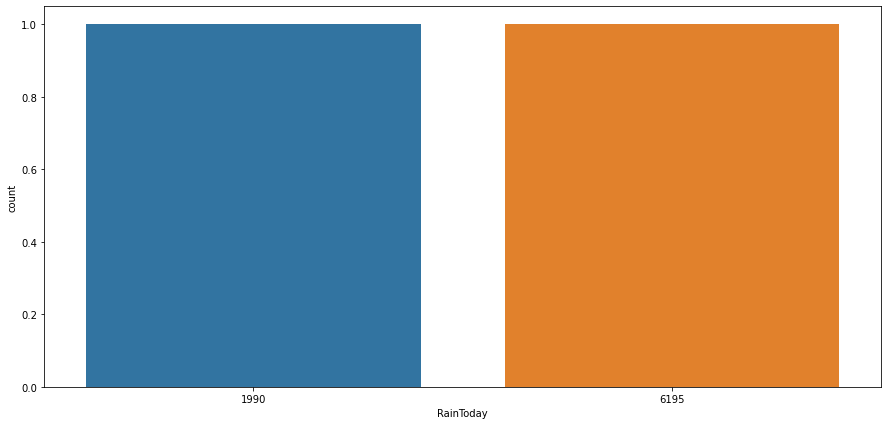

In [27]:
print(df['RainToday'].value_counts())
plt.figure(figsize=[15,7])
sns.countplot(df['RainToday'].value_counts())

RainToday  RainTomorrow
No         No              5142
           Yes              978
Yes        No              1013
           Yes              946
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

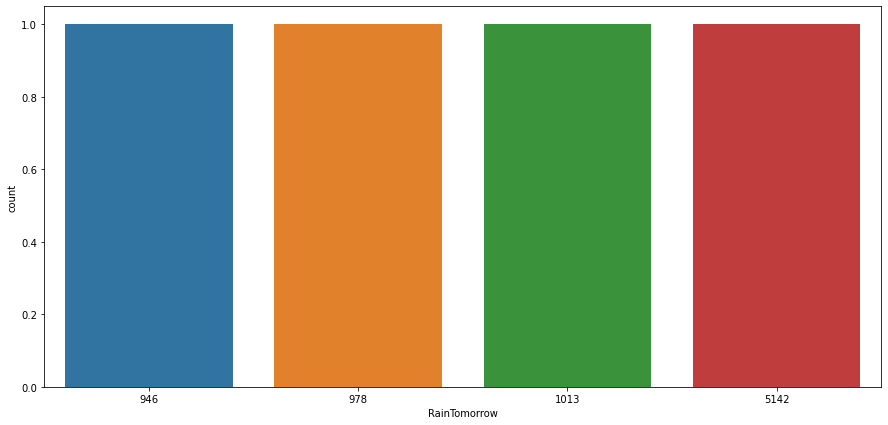

In [28]:
print(df.groupby('RainToday')['RainTomorrow'].value_counts())
plt.figure(figsize=[15,7])
sns.countplot(df.groupby('RainToday')['RainTomorrow'].value_counts())

<AxesSubplot:xlabel='RainToday', ylabel='count'>

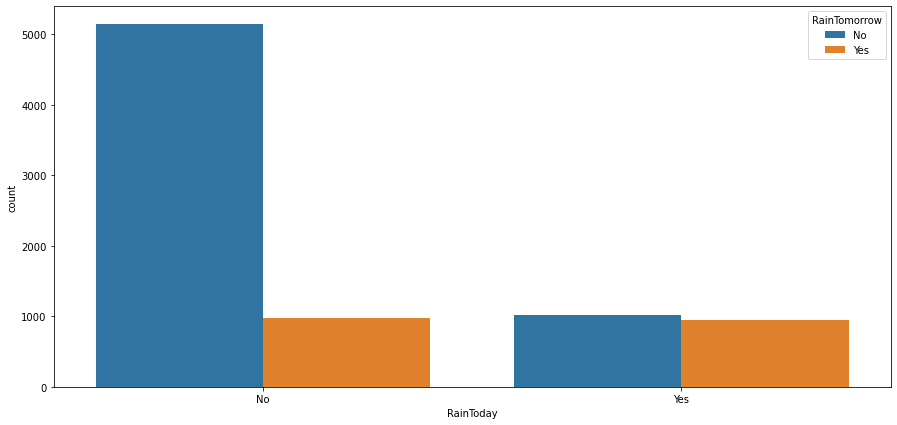

In [29]:
plt.figure(figsize=[15,7])
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])

### Correlation varaibles are holding with respect to th target and among themselves are as follows: 

In [30]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


<AxesSubplot:>

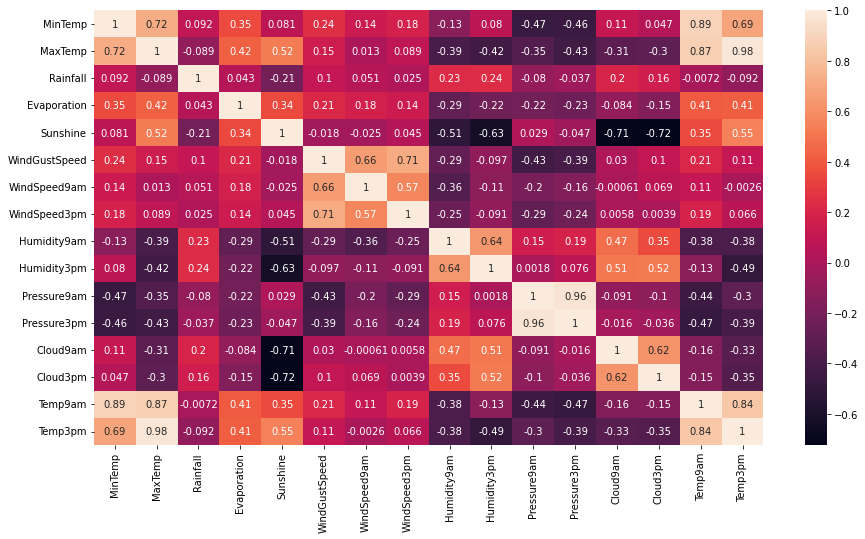

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

    Some varaibles do have strong correlation among themselves like MinTemp and Temp9am/ Temp3pm, and many other like this. 

# Filling out the missing values: 

In [32]:
yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)

yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)

yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)

In [35]:
df1= yes_rain.append(no_rain, ignore_index=True)

In [36]:
df1.dropna(inplace=True)

In [37]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [38]:
df1['Date']=pd.to_datetime(df1['Date'])

In [39]:
df1['year']=df1['Date'].dt.year
df1['month']=df1['Date'].dt.month
df1['day']=df1['Date'].dt.day

In [40]:
df1.drop('Date',axis=1,inplace=True)

In [41]:
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,E,...,1021.2,4.0,4.0,9.4,20.9,No,No,2017,6,20
8182,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,ENE,...,1020.3,4.0,4.0,10.1,22.4,No,No,2017,6,21
8183,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,N,...,1019.1,4.0,4.0,10.9,24.5,No,No,2017,6,22
8184,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,WNW,...,1016.8,4.0,4.0,12.5,26.1,No,No,2017,6,23


In [42]:
### Continous variables in df1
num=[col for col in df1.columns if df1[col].dtypes!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

### Multicolinerity: 

In [43]:
v=df1[num]
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.536558
1,MaxTemp,25.650652
2,Rainfall,1.131077
3,Evaporation,1.217936
4,Sunshine,2.137066
5,WindGustSpeed,2.353808
6,WindSpeed9am,2.030998
7,WindSpeed3pm,1.946039
8,Humidity9am,3.854017
9,Humidity3pm,5.579726


In [44]:
num.remove('Pressure9am')

In [45]:
num.remove('Temp9am')

In [46]:
### Dropping the same variables from the original dataset as well.
df1.drop(['Temp3pm','Temp9am','Pressure9am'],axis=1,inplace=True)

In [48]:
df1.shape

(8079, 22)

### Cheking out the outliers: 

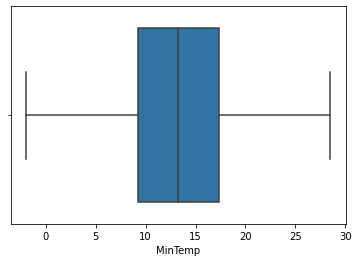

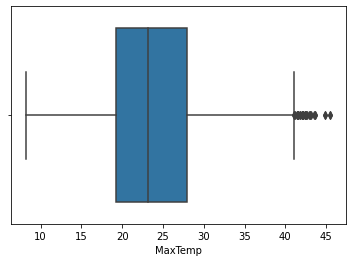

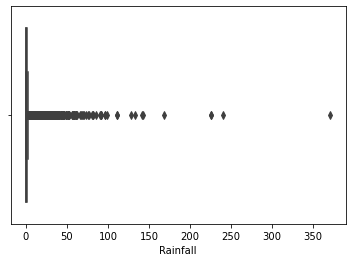

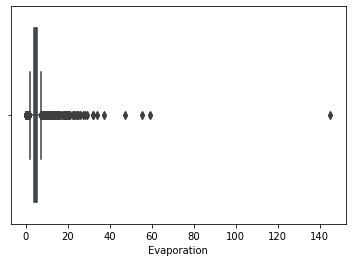

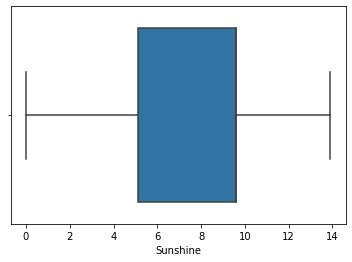

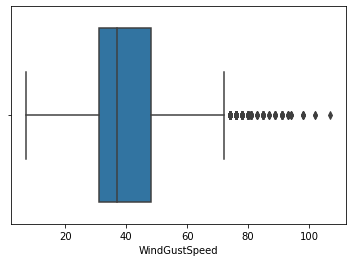

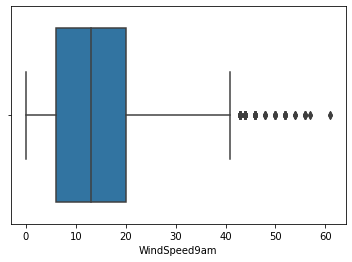

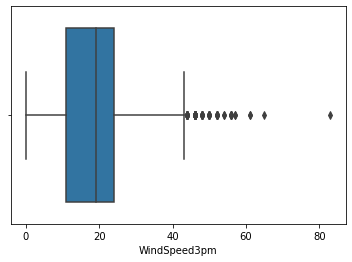

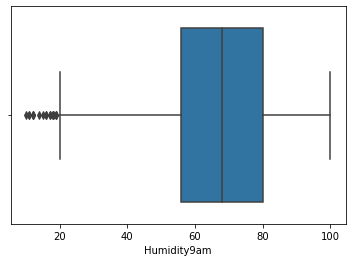

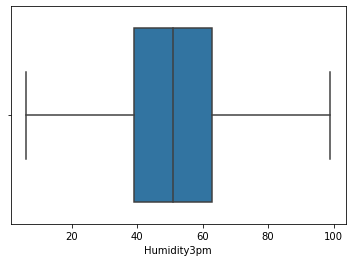

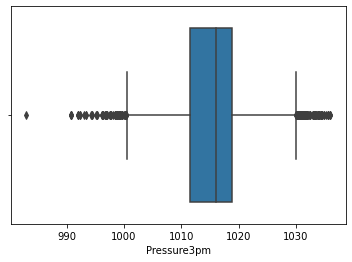

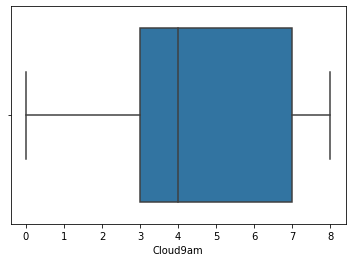

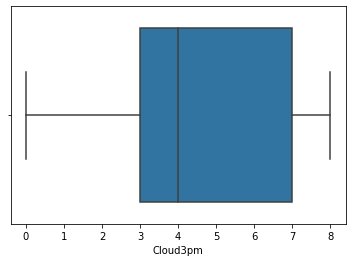

KeyError: 'Temp3pm'

In [49]:
for i in num:
    sns.boxplot(df1[i])
    plt.show()

Almost all variables are holding significant number of outliers in the dataset.

### Checking the skewness: 

In [51]:
df1.skew()

MinTemp          -0.070098
MaxTemp           0.394841
Rainfall         13.073756
Evaporation      13.998671
Sunshine         -0.822526
WindGustSpeed     0.784800
WindSpeed9am      0.949237
WindSpeed3pm      0.509973
Humidity9am      -0.250378
Humidity3pm       0.118933
Pressure3pm      -0.011625
Cloud9am         -0.261462
Cloud3pm         -0.185359
year              0.421639
month             0.054225
day               0.000577
dtype: float64

### Correcting both skewness and outliers from the dataset.

In [56]:
for i in num:
    IQR= df1[i].quantile(.75)-df1[i].quantile(.25)
    lower=df1[i].quantile(.25) - (1.5 * IQR)
    upper=df1[i].quantile(.75) + (1.5 * IQR)
    df1[i]=np.where(df1[i]<lower,lower,df1[i])
    df1[i]=np.where(df1[i]>upper,upper,df1[i])

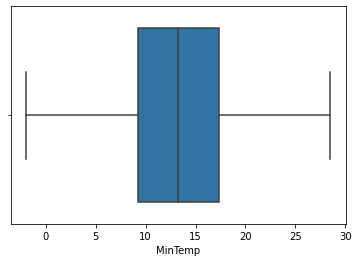

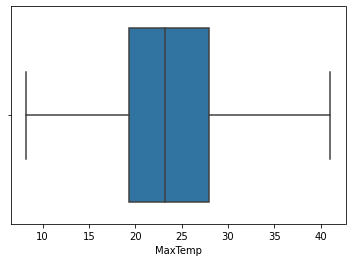

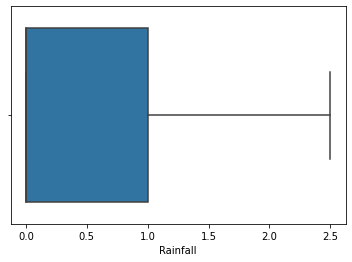

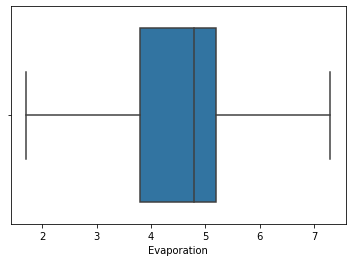

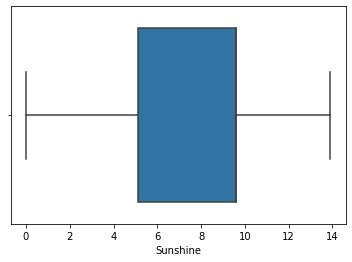

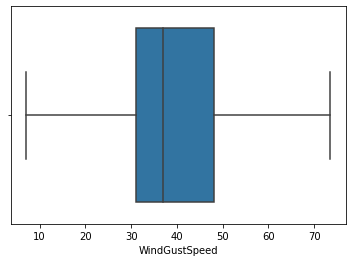

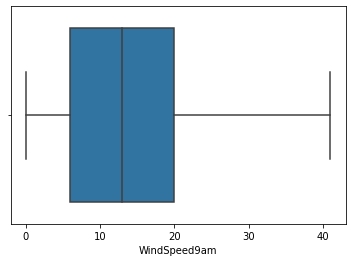

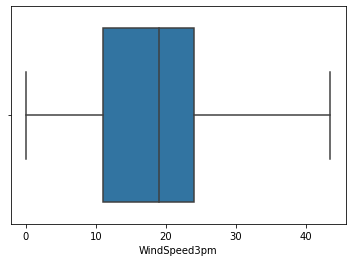

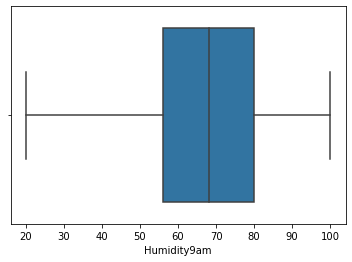

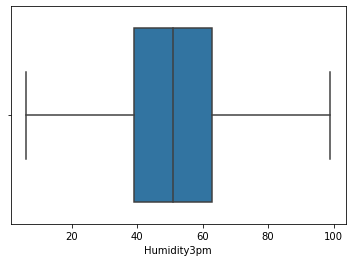

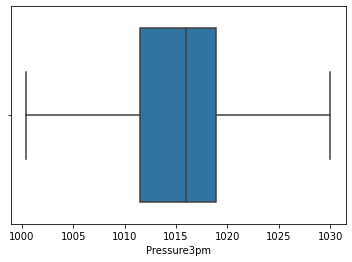

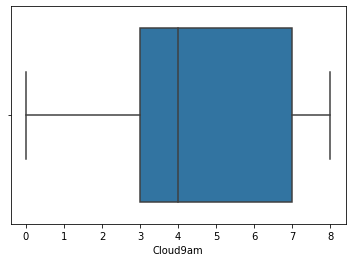

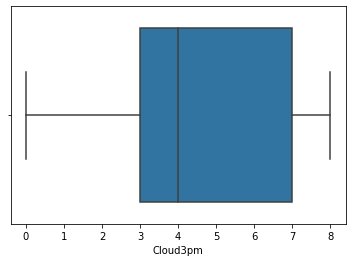

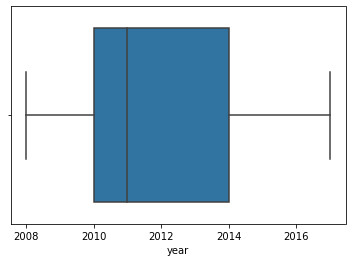

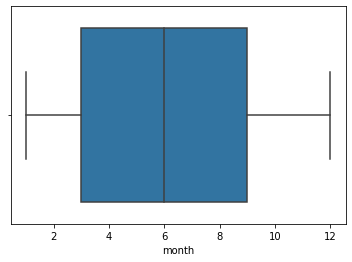

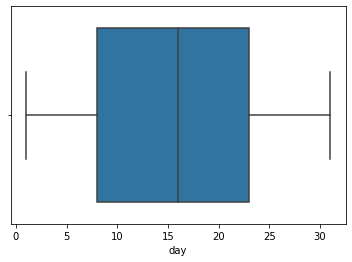

In [57]:
for i in num:
    sns.boxplot(df1[i])
    plt.show()

In [58]:
df1[num].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Rainfall         1.226519
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
year             0.421639
month            0.054225
day              0.000577
dtype: float64

### Performing the transformation: 

In [59]:
sc=StandardScaler()
for i in num:
    tran=power_transform(df1[num])
    df1[i]=sc.fit_transform(tran)

### Performing the ecoding: 

In [60]:
chit=df1[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]
chit

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,Albury,NNW,SE,NW,Yes
1,Albury,N,SSE,ESE,Yes
2,Albury,NNE,NE,ENE,Yes
3,Albury,W,NNW,NNW,Yes
4,Albury,ENE,SSW,E,Yes
...,...,...,...,...,...
8181,Uluru,E,ESE,E,No
8182,Uluru,E,SE,ENE,No
8183,Uluru,NNW,SE,N,No
8184,Uluru,N,SE,WNW,No


In [61]:
ordinal_label = {k: i for i, k in enumerate(chit['WindGustDir'].unique(), 0)}
chit['WindGustDir'] = chit['WindGustDir'].map(ordinal_label)
ordinal_label = {k: i for i, k in enumerate(chit['Location'].unique(), 0)}
chit['Location'] = chit['Location'].map(ordinal_label)
ordinal_label = {k: i for i, k in enumerate(chit['WindDir9am'].unique(), 0)}
chit['WindDir9am'] = chit['WindDir9am'].map(ordinal_label)
ordinal_label = {k: i for i, k in enumerate(chit['WindDir3pm'].unique(), 0)}
chit['WindDir3pm'] = chit['WindDir3pm'].map(ordinal_label)
chit['RainTomorrow'].replace('No',0,inplace=True)
chit['RainTomorrow'].replace('Yes',1,inplace=True)
chit

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,0,0,0,0,1
1,0,1,1,1,1
2,0,2,2,2,1
3,0,3,3,3,1
4,0,4,4,4,1
...,...,...,...,...,...
8181,11,12,7,4,0
8182,11,12,0,2,0
8183,11,0,0,9,0
8184,11,1,0,5,0


# Predictive model to forecast whether or not it will rain tomorrow.

In [62]:
### SPLITTING THE DATA NOT FOR THE MODEL.
input = chit.drop('RainTomorrow',axis=1)
output = chit['RainTomorrow']

In [63]:
df1['RainTomorrow'].replace('No',0,inplace=True)
df1['RainTomorrow'].replace('Yes',1,inplace=True)

df1['RainToday'].replace('No',0,inplace=True)
df1['RainToday'].replace('Yes',1,inplace=True)

In [92]:
X=df1.drop('RainTomorrow',axis=1)
Y=df1['RainTomorrow']

In [93]:
print(X.shape  , Y.shape)

(8079, 19) (8079,)


### Machine Learning Algorithms For Prediction: 

In [94]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=122,test_size=.3)

In [95]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [96]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

,Model,Accuracy,F1 Score
0,LogisticRegression(),77.15,29.70
1,RidgeClassifier(),77.02,27.00
2,DecisionTreeClassifier(),78.05,50.56
3,SVC(),76.94,0.00
4,KNeighborsClassifier(),77.76,42.48
5,"(DecisionTreeClassifier(max_features='sqrt', r...",79.58,51.61
6,SGDClassifier(),75.70,45.61
7,(DecisionTreeClassifier(random_state=42954514)...,80.45,52.98
8,"(DecisionTreeClassifier(max_depth=1, random_st...",77.27,31.21
9,([DecisionTreeRegressor(criterion='friedman_ms...,77.56,34.77


### Hypertuning: 

In [97]:
param = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [100]:
GCV=GridSearchCV(Bag_model,param_grid=param,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500]},
             verbose=2)

In [101]:
GCV.best_estimator_

BaggingClassifier(max_features=5, max_samples=0.5, n_estimators=100)

In [102]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.780940594059406

In [103]:
confusion_matrix(y_test,pred)

array([[1735,  130],
       [ 414,  145]], dtype=int64)

Text(0.5, 1.0, 'ROC AUC Plot')

<Figure size 1080x504 with 0 Axes>

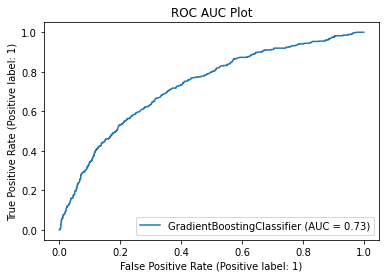

In [104]:
plt.figure(figsize=[15,7])
plot_roc_curve(GB_model,x_test,y_test)
plt.title('ROC AUC Plot')

### Saving the model: 

In [105]:
import joblib
joblib.dump(GB_model,"Rainfall_Prediction.pkl")

['Rainfall_Prediction.pkl']

# Now Predicting the Rainfall with Regression model.

In [106]:
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,1,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,9,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,0,1,-0.642992,-0.642992,-0.642992
1,1,0.054150,0.031187,0.031187,0.031187,0.031187,0.031187,10,0.031187,0.031187,0.031187,0.031187,0.031187,0.031187,0.031187,0,1,0.031187,0.031187,0.031187
2,1,0.513327,0.498052,0.498052,0.498052,0.498052,0.498052,4,0.498052,0.498052,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
3,1,0.513327,0.498052,0.498052,0.498052,0.498052,0.498052,6,0.498052,0.498052,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
4,1,0.182945,0.161018,0.161018,0.161018,0.161018,0.161018,11,0.161018,0.161018,0.161018,0.161018,0.161018,0.161018,0.161018,0,1,0.161018,0.161018,0.161018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,9,-1.794801,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,2,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,0,0,-1.751381,-1.751381,-1.751381
8182,9,-1.928608,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,9,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,0,0,-1.876512,-1.876512,-1.876512
8183,9,-1.775739,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,9,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,0,0,-1.733525,-1.733525,-1.733525
8184,9,-1.434531,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,9,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,0,0,-1.412489,-1.412489,-1.412489


In [107]:
df1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindDir9am       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [108]:
X=df1.drop('Rainfall',axis=1)
Y=df1['Rainfall']

In [109]:
print(X.shape , Y.shape)

(8079, 19) (8079,)


In [110]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso,ElasticNet,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [112]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [113]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=23,test_size=.3)
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 1.2074834737695888e-15
mean_square_error of LinearRegression() model 2.1423944125601413e-30
R2 Score of LinearRegression() model 100.0
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 0.0002985630158741413
mean_square_error of Ridge() model 1.4484612834164895e-07
R2 Score of Ridge() model 99.99998490333321
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 0.7900496568135081
mean_square_error of Lasso() model 0.9277101316888425
R2 Score of Lasso() model 3.308905170208909
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 0.00014434954061848395
mean_square_error of DecisionTreeRegressor() model 5.341349576546299e-06
R2 Score of DecisionTreeRegressor() model 99.99944329492502
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 0.04347379267815587
mean_square_error

### Performing the cross validation now: 

In [114]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 1.4636920484036734e-15
cross Validation score of root mean square  LinearRegression()  is  7.906016133576336e-16
**************************************************
Root mean_square of  Ridge() model 0.00038058655827767873
cross Validation score of root mean square  Ridge()  is  0.00034188097637710745
**************************************************
Root mean_square of  Lasso() model 0.9631771029716407
cross Validation score of root mean square  Lasso()  is  0.9975817091900925
**************************************************
Root mean_square of  DecisionTreeRegressor() model 0.0023111359926551917
cross Validation score of root mean square  DecisionTreeRegressor()  is  0.004703533050164732
**************************************************
Root mean_square of  SVR() model 0.05175774816582818
cross Validation score of root mean square  SVR()  is  0.04724885346170905
**************************************************
Root mean_square of  KN

### Hyperparameter tuning: 

In [115]:
n_estimator= [200, 400, 600, 800, 1000]  
max_features= ['auto','sqrt','log2']  
max_depth=[10, 64, 118, 173, 227, 282, 336]  
min_samples_split= [1,2,3]   
min_samples_leaf= [1,3,4,6,7,9]  

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [116]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search=RandomizedSearchCV(estimator=RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [117]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=227, max_features='log2', n_estimators=600)

In [118]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
np.sqrt(mean_squared_error(y_test,GCV_pred))

0.0007258115274766186

### Saving the model now: 

In [119]:
joblib.dump(grid_search.best_estimator_,"Rainfall_Prediction_in_mm.pkl")

['Rainfall_Prediction_in_mm.pkl']